# 機器學習 - KNN近鄰演算法 (一)
- 學期: 111 人工智慧 Summer Session 教材 (師培中心)
- 杜主民

## 最短距離分類器 - 教育部高中人工智慧書籍: [和 AI 做朋友 - 相知篇](https://market.cloud.edu.tw/resources/web/1798168), P.33
- 兩群資料分散 N 維度座標 (在此以 2 維度為範例)，各有數量 4 筆和 6 筆。若有一筆新資料於坐標軸 (4, 2)，該筆資料與兩群資料的中心點何者較近?
    - 計算兩群資料的中心點。
    - 計算歐幾里得距離。

<font color='red'>類別 | X | Y</font>
:--: | :--: | :--:
紅色 | 2 | 6
紅色 | 3 | 4
紅色 | 3 | 8
紅色 | 4 | 7
平均值 | 3 | 6.25

<font color='green'>類別 | X | Y</font>
:--: | :--: | :--:
綠色 | 6 | 2
綠色 | 6 | 3
綠色 | 7 | 3
綠色 | 7 | 4
綠色 | 7 | 6
綠色 | 8 | 5
平均值 | 6.83 | 3.83

In [18]:
t1 = np.array([1])
t2 = np.array([2])
np.append(t1,[2])

array([1, 2])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[7,5]

In [3]:
red = np.array([[2,6],[3,4],[3,8],[4,7]])
green = np.array([[6,2],[6,3],[7,3],[7,4],[7,6],[8,5]])

### 計算紅色點的中心點

In [4]:
x_redMean = np.array([k[0] for k in red]).mean()
y_redMean = np.array([k[1] for k in red]).mean()
red_Center=np.array([x_redMean, y_redMean])
print(red_Center)

[3.   6.25]


### 計算綠色點的中心點

In [5]:
x_greenMean = np.round(np.array([k[0] for k in green]).mean(), 2) 
y_greenMean = np.round(np.array([k[1] for k in green]).mean(), 2)
grn_Center  = np.array([x_greenMean, y_greenMean])
print(grn_Center)

[6.83 3.83]


### 繪圖

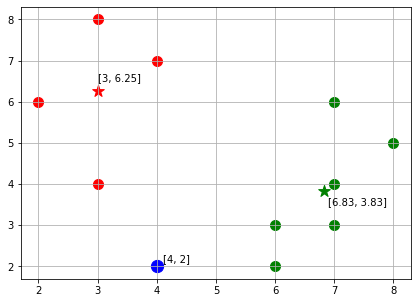

In [44]:
plt.scatter([2,3,3,4],[6,4,8,7], c='r',s=100)          # 紅色的點
plt.scatter(red_Center[0], red_Center[1], c='r',s=150,marker='*')  # 紅色的中心點

plt.scatter([6,6,7,7,7,8],[2,3,3,4,6,5], c='g',s=100)  # 綠色的點
plt.scatter(grn_Center[0],grn_Center[1], c='g',s=150,marker='*')   # 綠色的中心點

plt.scatter(4,2, c='b',s=150) # 藍色的點

plt.text(3, 6.5, [3, 6.25])
plt.text(6.9, 3.5, [6.83, 3.83])
plt.text(4.1, 2.1, [4, 2])
plt.grid(True)

### 在 2 維度的座標中，點  $a=(x_1, y_1)$ 和 點 $b=(x_2, y_2)$ 間歐幾里得距離:
#### $\|a - b\| = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$

### 在 N 維度的座標中，點 $a= (x_1, x_2, \cdots\, x_n)$ 和點 $b= (y_1, y_2, \cdots, y_n)$ 間歐幾里得距離:
### $\|a - b\| = \sqrt{(x_1-y_1)^2+(x_2-y_2)^2+\ldots+(x_n-y_n)^2}$
### 其中 $a = (x_1, x_2, \ldots, x_n)$與$b = (y_1, y_2, \ldots, y_n)$分別表示在 n 維空間中的兩個座標點。

藍色點座標 | 類別中心點座標 | 距離
:--: | :--: | :--:
(4,2) | <font color='red'>紅色 (3,6.25)</font> | $$ d = \sqrt[]{(4-3)^2 + (2-6.25)^2} = 4.37 $$
(4,2) | <font color='green'>綠色 (6.83,3.83)</font> |$$ d = \sqrt[]{(4-6.83)^2 + (2-3.83)^2} = 3.37 $$

### 計算歐幾里得距離

In [1]:
import numpy as np

In [13]:
zlist = zip([4,2],[3,6.25])
for i, j in zlist:
    print(i,j)

4 3
2 6.25


In [6]:
# 定義一個歐幾里得函數，計算兩兩資料之間的距離
def Euclidian(arX, arY):
    sumup = 0
    for x, y in zip(arX, arY):
        sumup = sumup + (x - y)**2   # (x - y) 平方後相加
    
    distance = np.sqrt(sumup)      # 開根號
    return distance

In [7]:
# 藍色點(4,2)和紅色中心點(red_Center)及綠色中心點(grn_Center)的距離
blue_dot = np.array([4, 2])
print(f'藍色點和紅色中心點距離:{Euclidian(blue_dot, red_Center)}')
print(f'藍色點和綠色中心點距離: {Euclidian(blue_dot, grn_Center)}')

藍色點和紅色中心點距離:4.366062299143245
藍色點和綠色中心點距離: 3.37013352851189


In [9]:
# 測試 new_dot to red_dot 距離 
#t1 = Euclidian(blue_dot, red_Center)
#t2 = Euclidian(blue_dot, grn_Center)
#print('t1:{:.2f}'.format(t1))
#print('t2:{:.2f}'.format(t2))

t1:4.37
t2:3.37


## KNN 分類器 - 教育部高中人工智慧書籍: [和 AI 做朋友 - 相知篇](https://market.cloud.edu.tw/resources/web/1798168) (p.35)
- 計算點 (5,5) 與 A_group 及 B_group 的各點之間的歐幾里得距離。
- 當 k=1, k=5, k=9 情況時，綠色的 (5, 5) 是屬於哪一個類別?

In [15]:
# 使用 Numpy 紀錄各點的位置
A_group = np.array([[4, 6],[5,7],[5,8],[5.8,6],[6,6],[6,7],\
                    [7,5],[7,7],[8,4],[9,5]])

# 使用 Numpy 紀錄各點的位置
B_group = np.array([[2,2],[4,2],[4,4],[5,4],[5,3],[6,2]])

### 分隔 A_group 和 B_group 的 x 和 y 

In [16]:
π = np.pi
θ = np.linspace(0, 2*π, 200)

AxList = [k[0] for k in A_group]  # A_group 的 x
AyList = [k[1] for k in A_group]  # A_group 的 y
BxList = [k[0] for k in B_group]  # B_group 的 x
ByList = [k[1] for k in B_group]  # B_group 的 y

### 繪圖

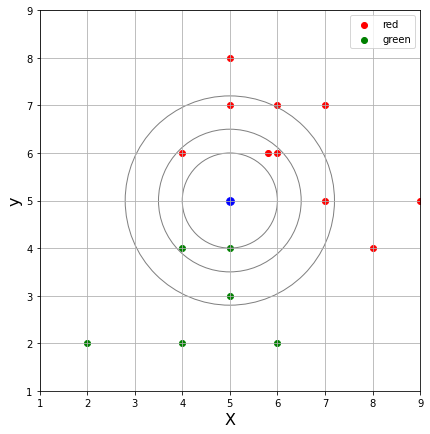

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,7]
ax = plt.gca()
ax.set_aspect('equal')
    
ax.scatter(AxList, AyList, c='r', label='red')
ax.scatter(BxList, ByList, c='g', label='green')
    
plt.xlim(1, 9)
plt.ylim(1, 9)
ax.set_xlabel('X',fontsize=16)
ax.set_ylabel('y',fontsize=16)

plt.scatter(5, 5, c='b', s=60)
circle1 = plt.Circle((5, 5), 1, color='gray', fill=False)
circle2 = plt.Circle((5, 5), 1.5, color='gray', fill=False)
circle3 = plt.Circle((5, 5), 2.2, color='gray', fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
plt.grid(True)
plt.legend()

In [70]:
# 定義一個歐幾里得函數，計算兩兩資料之間的距離
def Euclidian(arX, arY):
    sumup = 0
    for x, y in zip(arX, arY):
        sumup = sumup + (x - y)**2   # (x - y) 平方後相加
    
    distance = np.sqrt(sumup)      # 開根號
    return distance

### 計算藍色點(5,5) 和所有點的距離

In [68]:
blue_dot = [5, 5]

In [76]:
# 計算藍色點(5,5)和 A類別群組各點的距離
A_group_list = [np.round(Euclidian(blue_dot, k),2) for k in A_group]
# 計算藍色點(5,5)和 B類別群組各點的距離
B_group_list = [np.round(Euclidian(blue_dot, k),2) for k in B_group]
print(A_group_list)
print(B_group_list)

[1.41, 2.0, 3.0, 1.28, 1.41, 2.24, 2.0, 2.83, 3.16, 4.0]
[4.24, 3.16, 1.41, 1.0, 2.0, 3.16]


### 將距離排序

In [65]:
A_group_dist.sort() # 排序 A group
print('A 群', A_group_dist)

B_group_dist.sort() # 排序 B group
print('B 群', B_group_dist)

A 群 [1.28, 1.41, 1.41, 2.0, 2.0, 2.24, 2.83, 3.0, 3.16, 4.0]
B 群 [1.0, 1.41, 2.0, 3.16, 3.16, 4.24]


#### 參考教育部高中教材「和AI做朋友-相知篇」Page35 頁範例比對結果: 
```python
當 k=1, 比對最接近的 1 筆資料，new_dot[5, 5]該屬於 B_group。
當 k=5, 比對最接近的 5 筆資料，new_dot[5, 5]該屬於 A_group。
當 k=9，比對最接近的 9 筆資料，new_dot[5, 5]該屬於 A_group。
```

<hr style='border-color:brown; border-width:3px'>

## KNN 案例一 (使用 sklearn 內建 iris 資料集)
- 此範例不分隔訓練資料和測試資料
- 選擇 k=1

In [50]:
# 1) import 套件
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# 2) 讀取資料集 (sklearn 內建之  iris)
from sklearn.datasets import load_iris
iris = load_iris()

In [52]:
# 3) 選取 feature X 資料與 response Y 資料
X = iris.data
y = iris.target

In [53]:
print(X.ndim)
print(y.ndim)

2
1


In [63]:
# 4) 代入資料建立 KNeighborsClassifier 模型
from sklearn.neighbors import KNeighborsClassifier

# 建立物件 knn 物件，指定 'neighbor' k 值為 1
knn = KNeighborsClassifier(n_neighbors=1)

# 代入訓練資料建立模型
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [64]:
# 5) 測試訓練資料
y_pred = knn.predict(X)

### 使用 KNN 是**分類**的問題，和第 2 單元的迴歸問題不相同!
- 迴歸的問題是要預測連續性的數值；而分類的問題是要預測歸屬類別。
- 所以，模型評估指標的方法也不相同。在迴歸問題我們使用 MAE, MSE 或 RMSE 計算預測值和實際值的誤差。
- 而分類的問題則是計算正確率。
- 採此使用 sklearn.metrics 的 accuracy_score() 計算正確率。

In [65]:
from sklearn import metrics
print('預測的正確率: ', metrics.accuracy_score(y, y_pred))

預測的正確率:  1.0


#### 用訓練的資料去預測，且 k=1，預測的結果肯定是 100%。
- 這是好的成果嗎? 事實上對尚未觀測到的新資料的預測效果應該不會很好!
- 我們希望模型不只在訓練集上要表現良好，也必須能夠在先前未觀測到的新輸入上有良好表現。
- 但是當機器學習的模型很仔細學習訓練數據的特質，建立一個複雜的學習模型，但在實際應用上卻無法反映真實的資料情境，此現象稱為「**過度擬合**」(Overfitting)。
- 當選擇 k=1，也就是一筆資料就是一個分類，模型會嘗試去捕捉每一個點的正確分類，看起來對訓練資料的結果會是 100 % 正確分類，但是會造成過度複雜的模型，這樣的模型容易去符合訓練每一個資料的特徵，也就是吸收資料的雜訊 (Noise)，忽略資料的全體訊號 (Signal)，請參考下圖。
- 忽略資料的全體訊號，當遇到未觀測到的新輸入時，常會無法反映真實的資料情境。
- 所以，一個好的模型評估方法，除了要分隔訓練資料 (Training Data) 和測試資料 (Testing Data)之外，也要正確的選擇 k 值。

![Overfitting](https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg)

### 測試

In [99]:
knn.predict([[2.4,1.5,5.6,6.3]])

array([2])

<hr style='border-color:brown; border-width:3px'>

## 練習題一: 前述 iris 採用 sklearn 的 neighbors 模組的 KNeighborsClassifier 方法建立 KNN 模型物件，K 值為 1。
- 假若 k=2，預測的正確率多少? 
- 假若 k=1, 2, 3, … 30，哪一個 K 值的正確率最高? 請繪製折線圖顯示 K 值從 1-30 的變化。

In [66]:
# Solution 1


<hr style='border-color:brown; border-width:3px'>

## 練習題二: 糖尿病案例 - 平均一天喝幾杯含糖飲料以上，未來易得糖尿病?

- 欄位`Amount`代表一天喝的全糖飲料杯數，`Result`是 0 表示沒有糖尿病，1 表示罹患糖尿病。
- 此資料集很小，且案例的 target 值是 1 或 2，看似連續型資料，但實則是質性類別資料。
- 請預測一天喝幾杯全糖飲料容易得到糖尿病?
- 資料網址: `https://bit.ly/3HRhN77`

In [ ]:
# Solution 2


<hr style='border-color:brown; border-width:3px'>

## 練習題三: 人體皮膚資料集案例 - 預測皮膚癌
- 史丹福大學發展的監督式機器學習<a href='https://news.stanford.edu/2017/01/25/artificial-intelligence-used-identify-skin-cancer/'>影像檢測皮膚癌</a>。
- 皮膚癌在白種人的發生率高於黃種人數倍，一般人很容易將皮膚癌和身體的痣混淆。若罹患的是非致命性的基底皮膚癌，應該還不用太擔心，但若罹患的是致命性很高的黑色素皮膚癌，未能及早發現治療恐有致的危險。
- 一般人難以輕易分辨痣/良性/惡性皮膚癌，史丹福大學的人工智慧團隊，以130,000張 labeled 皮膚癌照片，以機器學習的演算方法辨識皮膚癌，而且有著很高的辨識率。
- 資料集共有 4 個欄位，前 3 個欄位是 features，分別是皮膚影像檢測的 R G B 數值；第四個欄位是 target，是檢測的結果，1 代表有異常情況，2 代表沒有。
- 資料網址: https://bit.ly/3xNwrYs

In [ ]:
# Solution 3


<hr style='border-color:brown; border-width:3px'>

## 練習題四 : 請將前述 iris 資料集分割為訓練資料和測試資料，請將 X_test 帶入KNN 模型<font color='brown'>預測 y_pred，從 k=1, 2, 3, … 30</font>，哪一個 K 值的正確率最高? 請繪製折線圖顯示 K 值從 1-30 的正確率。

In [ ]:
# Solution 4


<hr style='border-color:brown; border-width:3px'>

## 練習題五: 請將前述皮膚癌的資料集分割為訓練資料和測試資料，請將 X_test 帶入KNN 模型預測 y_pred，從 k=1, 2, 3, … 15，哪一個 K 值的正確率最高? 請繪製折線圖顯示 K 值從 1-15 的變化。

In [ ]:
# Solution 5


<hr style='border-color:brown; border-width:3px'>

## 練習題六: 請讀取鐵達尼號資料集，網址 http://bit.ly/kaggletrain ，命名 titanic。
- 從 titanic 選取Pclass和Sex欄位當成features，Survived 當成 target。
- 將資料分割為訓練資料和測試資料。
- 請以 KNN 預測 Survived，請問在 k=5 時正確率是多少?

In [ ]:
# Solution 6
